In [ ]:
#WEB SCRAPPING

In [88]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [283]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 400

reviews = []

In [284]:
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [285]:
url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

In [286]:
response = requests.get(url)
response

<Response [200]>

In [287]:
content = response.content
parsed_content = BeautifulSoup(content, 'html.parser')
for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())
    
print(f"   ---> {len(reviews)} total reviews")

   ---> 309 total reviews


In [292]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Hannover - LHR. What a miserable experience th...
1,NCL-LHR-LAX / LAS-LHR-NCL. NCL-LHR A320. Comfo...
2,Flew from LGW to PFO and back recently. Plane ...
3,LHR-JNB (South Africa). Booking done from site...
4,Flew earlier this month LHR to IST in Club Eur...


In [291]:
df.to_excel(r"C:\Users\user\Desktop\For Github\Airline_final.xlsx")

In [ ]:
#SENTIMENT ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
#Importing the data

df = pd.read_excel(r"C:\Users\user\Desktop\For Github\Airline_final.xlsx")
df

,Unnamed: 0,customers_reviews
0,0,Hannover - LHR. What a miserable experience th...
1,1,NCL-LHR-LAX / LAS-LHR-NCL. NCL-LHR A320. Comfo...
2,2,Flew from LGW to PFO and back recently. Plane ...
3,3,LHR-JNB (South Africa). Booking done from site...
4,4,Flew earlier this month LHR to IST in Club Eur...
...,...,...
304,304,Flew LHR - VIE return operated by bmi but BA a...
305,305,LHR to HAM. Purser addresses all club passenge...
306,306,My son who had worked for British Airways urge...
307,307,London City-New York JFK via Shannon on A318 b...


In [295]:
df.head()

,Unnamed: 0,customers_reviews
0,0,Hannover - LHR. What a miserable experience th...
1,1,NCL-LHR-LAX / LAS-LHR-NCL. NCL-LHR A320. Comfo...
2,2,Flew from LGW to PFO and back recently. Plane ...
3,3,LHR-JNB (South Africa). Booking done from site...
4,4,Flew earlier this month LHR to IST in Club Eur...


In [5]:
df['customers_reviews'].values[0]

'Hannover - LHR. What a miserable experience this was. This return ticket was £950 for a total of about 140 mins flying time. I checked in online and there was considerable delays on this as there was following a phone call back to the UK an equipment change from an A319 to an A320. Anyway I checked in online eventually and made my way through security. I asked an information post - as to where the Club / Business class lounge was and I was told it was land side and between "this terminal and the next terminal". I could not believe it. Surely a simple prompt online when checking in - could have told me this. Flight left on time a reasonable light lunch and three Gin and Tonics later we got stacked over the East End for 25 minutes but landed "ahead of schedule". A miserable experience from the so called "world\'s favorite airline".'

In [299]:
#Basic NLTK

In [23]:
example = df['customers_reviews'][50]
example

'Flew Heathrow to Lyon return. Late flight on the way out but made up all but 10 mins of the time. Catering hardly worth the effort as comprised unappetising looking sandwich and one drink (not even tea or coffee on the outbound). Crew good and check in very good especially at Heathrow.'

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
token = nltk.word_tokenize(example)
token[:10]

['Flew',
 'Heathrow',
 'to',
 'Lyon',
 'return',
 '.',
 'Late',
 'flight',
 'on',
 'the']

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.8628}

In [29]:
#run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['customers_reviews']
    myid = row['Unnamed: 0']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/309 [00:00<?, ?it/s]

In [30]:
res

{0: {'neg': 0.054, 'neu': 0.905, 'pos': 0.041, 'compound': -0.2517},
 1: {'neg': 0.068, 'neu': 0.742, 'pos': 0.19, 'compound': 0.9952},
 2: {'neg': 0.1, 'neu': 0.751, 'pos': 0.149, 'compound': 0.9081},
 3: {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.9637},
 4: {'neg': 0.037, 'neu': 0.83, 'pos': 0.133, 'compound': 0.7574},
 5: {'neg': 0.088, 'neu': 0.891, 'pos': 0.021, 'compound': -0.8436},
 6: {'neg': 0.144, 'neu': 0.707, 'pos': 0.149, 'compound': 0.5494},
 7: {'neg': 0.117, 'neu': 0.827, 'pos': 0.055, 'compound': -0.8342},
 8: {'neg': 0.076, 'neu': 0.799, 'pos': 0.125, 'compound': 0.6151},
 9: {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9826},
 10: {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.9885},
 11: {'neg': 0.118, 'neu': 0.708, 'pos': 0.174, 'compound': 0.5263},
 12: {'neg': 0.059, 'neu': 0.841, 'pos': 0.1, 'compound': 0.5566},
 13: {'neg': 0.054, 'neu': 0.809, 'pos': 0.137, 'compound': 0.9798},
 14: {'neg': 0.061, 'neu': 0.782, 'pos': 0.157, 'comp

In [44]:
result = pd.DataFrame(res).T
result

,neg,neu,pos,compound
0,0.054,0.905,0.041,-0.2517
1,0.068,0.742,0.190,0.9952
2,0.100,0.751,0.149,0.9081
3,0.000,0.845,0.155,0.9637
4,0.037,0.830,0.133,0.7574
...,...,...,...,...
304,0.027,0.667,0.306,0.9840
305,0.000,0.712,0.288,0.8720
306,0.056,0.875,0.069,0.4516
307,0.000,0.711,0.289,0.9148


In [ ]:
#merging the result into original dataframe

In [45]:
result = result.reset_index(). rename(columns = {'index': 'Unnamed: 0'}) 
result= result.merge(df, how = 'left')
result

,Unnamed: 0,neg,neu,pos,compound,customers_reviews
0,0,0.054,0.905,0.041,-0.2517,Hannover - LHR. What a miserable experience th...
1,1,0.068,0.742,0.190,0.9952,NCL-LHR-LAX / LAS-LHR-NCL. NCL-LHR A320. Comfo...
2,2,0.100,0.751,0.149,0.9081,Flew from LGW to PFO and back recently. Plane ...
3,3,0.000,0.845,0.155,0.9637,LHR-JNB (South Africa). Booking done from site...
4,4,0.037,0.830,0.133,0.7574,Flew earlier this month LHR to IST in Club Eur...
...,...,...,...,...,...,...
304,304,0.027,0.667,0.306,0.9840,Flew LHR - VIE return operated by bmi but BA a...
305,305,0.000,0.712,0.288,0.8720,LHR to HAM. Purser addresses all club passenge...
306,306,0.056,0.875,0.069,0.4516,My son who had worked for British Airways urge...
307,307,0.000,0.711,0.289,0.9148,London City-New York JFK via Shannon on A318 b...


In [ ]:
#exporting the result as excel file

In [317]:
result.to_excel(r"C:\Users\user\Desktop\For Github\Airline_final_sentiment.xlsx")

In [ ]:
#TOPIC MODELLING


In [2]:
!pip install absl-py
!pip install tensorflow
!pip install tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install transformers datasets

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

# Deep learning
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub

# Hugging Face
from transformers import pipeline

# Scikit-learn
from sklearn.cluster import KMeans

# NLP
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk

In [48]:
# Download some nltk required data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# Universal sentence encoder (from Google)
USE_encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


# Function to use USE encoder
def embed(input):
    return np.array(USE_encoder(input))

In [50]:
# Get sentiment model from hugging face platform

sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [51]:
def sentiment(input):
    result = sentiment_model(input[:512])
    sign = 1 if(result[0]['label']=="POSITIVE") else -1
    value = result[0]['score']
    return sign*value

In [321]:
df = pd.read_excel(r"C:\Users\user\Desktop\For Github\Airline_final_sentiment.xlsx")

df.shape

(309, 8)

In [322]:
df.sample(10)

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,neg,neu,pos,compound,customers_reviews
133,133,133,133,0.054,0.793,0.153,0.8310,LHR-BSL-LHR A319's each way check/bag drop atT...
274,274,274,274,0.000,0.537,0.463,0.8176,Rating : 10/10 Cabin Flown Economy Value for M...
254,254,254,254,0.115,0.727,0.159,0.5416,San Diego return business class (the seat was ...
88,88,88,88,0.053,0.799,0.148,0.8244,I flew from Gatwick to Rome and back on holida...
51,51,51,51,0.019,0.836,0.146,0.8734,LHR-MCT-LHR. Excellent outbound flight. Tasty ...
178,178,178,178,0.071,0.820,0.109,0.9152,London - BKK Premium economy 19/6/14. I always...
28,28,28,28,0.126,0.680,0.194,0.9878,Flew LHR-BUD 11 Sep BA866 and return 15 Sep BA...
33,33,33,33,0.090,0.857,0.053,-0.7342,If there is an alernative I will never fly BA ...
121,121,121,121,0.020,0.805,0.175,0.9755,DME-LHR July 23 Club World seat 64A. It was qu...
9,9,9,9,0.000,0.743,0.257,0.9826,LHR-FCO. Flew out Club Europe courtesy of a re...


In [323]:
# focusing on customers_reviews
Air_reviews = df['customers_reviews'].dropna().tolist()



In [324]:
#Create topic model

class ReviewsTopicModel:

    STOPWORDS = stopwords.words('english') # stopwords from ntlk

    EMBEDDING_DIM = 512 # USE encoder

    # Constructor
    def __init__(self, reviews):
        self.X = self.clean(reviews)

    # Clean text method
    def clean(self, reviews):
        # Words to replace
        string_map = {'\r': '', '\n': '', '/': ' ', "'": "", '"': '', 'Trip Verified': '', '|': ''}
        reviews_cleaned = reviews[:]
        for i in range(len(reviews_cleaned)):
            for s in string_map:
                reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower() 
        # Transform the reviews into embeddings dataframe
        X = embed(reviews_cleaned)
        X = pd.DataFrame(X)
        X.index = reviews_cleaned
        return X

    # Method to determine number of topics (a.k.a kmeans cluster number)
    def elbow_plot(self):
        cluster_sizes = list(range(1, 81))
        cluster_scores = []
        for n in cluster_sizes:
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(self.X)
            cluster_scores.append(kmeans.inertia_)
        plt.figure()
        plt.plot(cluster_sizes, cluster_scores)
        plt.show()

    # Method to extract topics from text data
    def create_topics(self, num_topics):
        # Cluster the reviews
        kmeans = KMeans(n_clusters=num_topics)
        kmeans.fit(self.X)

        # Create the final topics dataframe
        topics_df = self.X.copy()
        topics_df['topic'] = kmeans.labels_.copy()
        topics_df['topic'] = topics_df['topic'].astype(int)

        # Create summary keywords per topic
        topic_keywords = {}
        for topic in topics_df['topic'].unique():
            topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
            topic_centroid = kmeans.cluster_centers_[topic] # cluster center
            topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
        topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

        # Score the sentiment of each review
        topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

        # Final result
        self.topics_keywords = topic_keywords
        self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]


    def get_closest_words(self, reviews, centroid):
        word_distances = {}
        for r in reviews:
            review_words = [w for w in word_tokenize(r) if(w not in self.STOPWORDS)]
            for w in review_words:
                word_embedding = embed([w]) # return 512 dimensional vector for the word 'w'
                # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
                word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
        # done collecting the distances of the words to the topic's center
        top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-5:]
        return ",".join([x[1] for x in top_5_keywords])

    def cosine_similarity(self, x, y):
        # x,y are both the appropriate dimension
        x = x.reshape(self.EMBEDDING_DIM,)
        y = y.reshape(self.EMBEDDING_DIM,)
        # calculate cosine similarity
        dotproduct = x.dot(y)
        x_mag = x.dot(x)**0.5
        y_mag = y.dot(y)**0.5
        # returns closer to 1 if x and y are similar, closer to 0 if they are different
        return dotproduct/(x_mag * y_mag)


In [325]:
topic_model = ReviewsTopicModel(Air_reviews)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

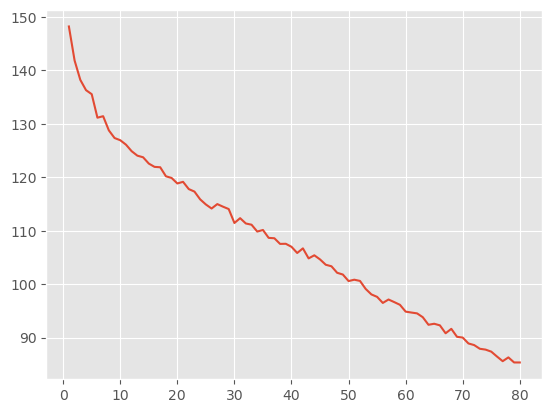

In [326]:
topic_model.elbow_plot() # going to use 40 clusters i.e. 40 topics

In [333]:
topic_model.create_topics(num_topics=25)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [328]:
topic_model.topics_df

,topic,topic_keywords,sentiment
hannover - lhr. what a miserable experience this was. this return ticket was £950 for a total of about 140 mins flying time. i checked in online and there was considerable delays on this as there was following a phone call back to the uk an equipment change from an a319 to an a320. anyway i checked in online eventually and made my way through security. i asked an information post - as to where the club business class lounge was and i was told it was land side and between this terminal and the next terminal. i could not believe it. surely a simple prompt online when checking in - could have told me this. flight left on time a reasonable light lunch and three gin and tonics later we got stacked over the east end for 25 minutes but landed ahead of schedule. a miserable experience from the so called worlds favorite airline.,1,"passengers,airlines,inflight,ryanair,airline",-0.999208
ncl-lhr-lax las-lhr-ncl. ncl-lhr a320. comfortable enough for only a 1hr flight. crew did a great job serving a full flight in such a short space of time. overhead bins were full and was a bit tricky finding space. some passengers had put very small bags overhead and not under seats and refused to take them down it did seem people have more carry-on than allowed. took off on time and arrived early but this meant no stand available for 15mins. lhr-lax on a380. paid to get two economy seats on the upper deck together and was worth the money as no stranger next to us no moving for loo breaks etc. aircraft excellent ife great (games were good moving maps etc also great) crew superb food was nice (first meal very good!) and the ice lollies were a great touch but did think an extra drinks service would have been good. we were close to a galley so easy enough to go and ask for drinks which we did two three times. seat was good but equal space to the earlier a320. extra bin beside seat was useful. the arm rest doesnt go all the way up which was a bit of a pain. take off delayed by a fault on the airbridge but arrived on time - takes a while to get off due to number of people. las-lhr on a b747. older aircraft and compared to the brand new a380 it showed again paid to get two seats together which was worth it. seat ok but not as comfortable as previous flights food was ok ife was ok but my ptv was off centre so had to watch sideways. overall just an ok flight. crew were friendly and didnt hide away all night which normally happens on late flights with other carriers. my only problem was the arm rest didnt go up and when the seat in front of me reclined i couldnt get out. lhr-ncl on a a319. super quick flight not 100% full but crew again worked quickly to get everyone drinks and snacks. arrived 15min early but took a while for bags to come off at ncl.,2,"qantas,legroom,airline,in-flight,inflight",-0.995106
flew from lgw to pfo and back recently. plane was old tatty 737 but at least we got the 34 of legroom which the refitted planes no longer have. flights were on time both ways food was reasonably good & cabin staff were charming (specially on the outboard flight). i was surprised to find ba no longer has a club lounge at paphos and even more surprised to find that there was a comfortable lounge there that ba club europe passengers were unable to use. we were given vouchers as compensation and thought we would at least get a glass of wine and a sandwich - but no. the vouchers were of such low value they could only be redeemed for things like a local beer crisps and chewing gum. even though the flights were quite good i feel that ba are treating their club europe passengers with contempt by denying them any lounge access or reasonable compensation - also by refitting their aircraft to give passengers less seat width and the same legroom as economy. why pay a premium price for a non premium product?,2,"qantas,legroom,airline,in-flight,inflight",0.962851
lhr-jnb (south africa). booking done from site www.britishairways.com and the che

In [74]:
topic_model.topics_keywords[35]

'flight,landing,boarding,iced,cabin'

In [82]:
topic_model.topics_df.query("topic == 0")

,topic,topic_keywords,sentiment
✅ trip verified london heathrow to lisbon. mediocre. the flight was very smooth and arrived on time. cabin service left a great deal to be desired and staff seemed to be just going through the motions. no bread roll was offered during meal service and despite requesting a glass of wine to accompany the meal this was not forthcoming and staff required a ‘nudge’ before it was delivered. not a great club europe experience.,0,"legroom,airlines,emirates,flown,inflight",-0.999257
✅ trip verified flight from gatwick to barbados. check in and business lounge were good. it looks like they had added champagne to the self service drinks which is a positive. breakfast was good. flight left on time boarding well run. i have not flown in their economy cabin for a while and it seems ok. new configuration but that does come with panasonic ife system which is way better than the old rockwell collins systems. food was fine and service friendly.,0,"legroom,airlines,emirates,flown,inflight",0.998769
✅ trip verified san francisco to london. efficient check in by friendly agent who offered an upgrade to first at $760 per person which we declined. refurbished lounge was spacious and comfortable with nice selection of snacks. boarding on time but could have been better controlled. flight left and landed ahead of schedule. flight attendants were excellent and the food is vastly improved compared to our last trip. business class is not cheap but we had an excellent flight with no complaints.,0,"legroom,airlines,emirates,flown,inflight",0.999258
"✅ trip verified mexico city to barcelona via london heathrow. the b787 is an incredible plane. the legroom is quite good, the seat is comfortable and the ife has a great number of movies, series and music. the food is average, the first meal was meat with mashed potatoes, salad and wine. not very tasty. the breakfast was scrambled eggs with mushrooms, fruit and a muffin, it was delicious! the cabin crew was ok. not bad, not excellent. we arrived on time and was a great flight. on the second flight the cabin crew appeared twice. no ife, no onboard service. it’s almost like a low cost. i recommend for long flights, but not for european flights.",0,"legroom,airlines,emirates,flown,inflight",0.999423
"✅ trip verified glasgow to london. smooth flight, departure arrival on time. boarding was quick, the seat was ok. although i had pre-ordered a vegetarian option, the caterer hadnt provided any (so they said) - but the flight attendant quickly solved the issue. the food was good, and the wine (french, bourgogne) also surprisingly good. flight attendant was professional, polite and attentive to detail. all in all, a great flight.",0,"legroom,airlines,emirates,flown,inflight",0.999720
...,...,...,...
"✅ trip verified mexico city to barcelona via london heathrow. the b787 is an incredible plane. the legroom is quite good, the seat is comfortable and the ife has a great number of movies, series and music. the food is average, the first meal was meat with mashed potatoes, salad and wine. not very tasty. the breakfast was scrambled eggs with mushrooms, fruit and a muffin, it was delicious! the cabin crew was ok. not bad, not excellent. we arrived on time and was a great flight. on the second flight the cabin crew appeared twice. no ife, no onboard service. it’s almost like a low cost. i recommend for long flights, but not for european flights.",0,"legroom,airlines,emirates,flown,inflight",0.999423
"✅ trip verified glasgow to london. smooth flight, departure arrival on time. boarding was quick, the seat was ok. although i had pre-ordered a vegetarian option, the caterer hadnt provided any (so they said) - but the flight attendant quickly solved the issue. the food was good, and the wine (french, bourgogne) also surprisingly good. flight attendant was professional, polite and attentive to detail. all in all, a great flight.",0,"legroom,airlines,emirates,flown,inflight",0.999720
"✅ trip verified 

In [ ]:
#Look at average sentiment per topic

In [362]:
Airline_topic_model = topic_model.topics_df.groupby(['topic', 'topic_keywords']).agg({'sentiment': 'mean'}).reset_index()\
    .sort_values(by='sentiment')

In [360]:
topic_model.topics_df.query("topic == 0")

,topic,topic_keywords,sentiment
i was on ba 835 from dublin to lhr on 25th july 2014 which left dublin at 13.05 and my travel plans were such that i had sufficient time to connect with my flight from lhr to hong kong. on leaving dublin the pilot opined that it was a good day to fly! on reaching lhr we were informed that due to thunderstorms we were to be diverted to gatwick and were running out of fuel. in summary we sat on the tarmac at gatwick for over two hours with only scant updates as to when we would be taking off for lhr and the temperature inside the cabin became oppressive which added to the misery. on reaching lhr ba staff were in my opinion ineffectual with a sorry and shrug of the shoulders and with no real assistance for those passengers on connecting flights. i was lucky as i managed to get on my flight to hong kong with cathay pacific but with only moments to spare after a dash to terminal 3. whilst i understand the volatility of the weather the real point of my review is that ba appears to have abandoned the basics of customer service and this is clearly reflected in bas absence in the top 10 airline ratings. could do a lot better!,0,"hong,belfast,lhr,airline,cathay",-0.990500
flew from lhr to hong kong april 13th 2014 ba 25 and the flight took off 1 hour late. therefore as i had an onwards connection to jakarta with limited time to get my connection i asked on board about help with getting my onwards boarding card to jakarta as ba in belfast refused to issue me a boarding card. the csd was not seen nor did he even come to speak with me even though i am ggl member. the only help i got was from one of the hong kong based air stewardesses who went out of her to help me. without her help i would have missed my onwards to jakarta. certainly not impressed by the service. i made a follow up compliant however never received any response.,0,"hong,belfast,lhr,airline,cathay",-0.998438


In [364]:
Airline_topic_model.to_excel(r"C:\Users\user\Desktop\For Github\Airline_TopicModelling.xlsx")